In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization

In [ ]:
!unzip -u "/content/drive/MyDrive/Dataset for DL/Naturalist_Birds.zip" -d "/content/drive/MyDrive/Dataset for DL/Naturalist_Birds"

Archive:  /content/drive/MyDrive/Dataset for DL/Naturalist_Birds.zip


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential

In [ ]:
train_path="/content/drive/MyDrive/Dataset for DL/Naturalist_Birds/train"
test_path="/content/drive/MyDrive/Dataset for DL/Naturalist_Birds/test"
valid_path="/content/drive/MyDrive/Dataset for DL/Naturalist_Birds/valid"

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches=train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

validation_batches=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

test_batches=test_datagen.flow_from_directory(
    test_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)


Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(7,7),activation='relu',input_shape=(128,128,3))),
model.add(MaxPool2D(2,2)),
model.add(Conv2D(64,(7,7),activation='relu')),
model.add(MaxPool2D(2,2)),
model.add(Conv2D(128,(5,5),activation='relu')),
model.add(MaxPool2D(2,2)),
model.add(Conv2D(256,(3,3),activation='relu')),
model.add(MaxPool2D(2,2)),
model.add(Conv2D(512,(2,2),activation='relu')),
model.add(MaxPool2D(2,2)),
model.add(Flatten())

#hidden layer 1
model.add(Dense(256,activation='relu'))

#output layer
model.add(Dense(20,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 32)      4736      
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 64)        100416    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 128)       0

1. The number of filters (or output channels) in the layer is indicated by the first argument, and the convolutional kernel's (filter's) size is indicated by the second. The filters for the first model are [32,64,128,256,512]. The filter size are (7,7),(7,7),(5,5),(3,3),(2,2).

2. To specify the shape of the input data, the input_shape parameter is only provided in the first layer. The input shape of subsequent layers is automatically inferred. When MaxPool2D layers are used, the maximum value within each 2x2 window is kept when the pool size is set to (2, 2).

3. Multiple convolutional layers, max pooling layers for feature extraction, and fully connected layers for classification make up this model. To add non-linearity, the ReLU activation function is applied across the convolutional and fully connected layers. Lastly, probability distributions across the classes are provided by the output layer's softmax activation function.

In [ ]:
#compiling
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#trianing the model
history=model.fit(x=train_batches,
                  validation_data=validation_batches,
                  epochs=20,
                  verbose=2
                  )

Epoch 1/20
101/101 - 755s - loss: 2.8875 - accuracy: 0.0948 - val_loss: 2.7895 - val_accuracy: 0.1300 - 755s/epoch - 7s/step
Epoch 2/20
101/101 - 13s - loss: 2.5228 - accuracy: 0.2020 - val_loss: 2.2783 - val_accuracy: 0.2800 - 13s/epoch - 127ms/step
Epoch 3/20
101/101 - 13s - loss: 2.1995 - accuracy: 0.3067 - val_loss: 2.2207 - val_accuracy: 0.3600 - 13s/epoch - 128ms/step
Epoch 4/20
101/101 - 13s - loss: 1.9643 - accuracy: 0.3722 - val_loss: 1.8320 - val_accuracy: 0.3700 - 13s/epoch - 128ms/step
Epoch 5/20
101/101 - 13s - loss: 1.7142 - accuracy: 0.4507 - val_loss: 1.4882 - val_accuracy: 0.4700 - 13s/epoch - 127ms/step
Epoch 6/20
101/101 - 13s - loss: 1.4915 - accuracy: 0.5246 - val_loss: 1.6079 - val_accuracy: 0.5000 - 13s/epoch - 126ms/step
Epoch 7/20
101/101 - 13s - loss: 1.2668 - accuracy: 0.5898 - val_loss: 1.3768 - val_accuracy: 0.5800 - 13s/epoch - 126ms/step
Epoch 8/20
101/101 - 13s - loss: 1.1613 - accuracy: 0.6250 - val_loss: 1.1979 - val_accuracy: 0.6100 - 13s/epoch - 126m

An epoch pass through the entire training dataset. The training process iterates over 20 times. In order to maximize accuracy on both the training and validation datasets and minimize the loss function, the model's parameters (weights and biases) are adjusted during the training process. The indicators that are disclosed shed light on the model's performance and development throughout the training process. To make sure the model is learning efficiently and isn't overfitting to the training set, it's critical to keep an eye on these indicators.

In [ ]:
predictions=model.predict(x=test_batches,verbose=0)
predictions=np.round(predictions)

In [ ]:
print(model.evaluate(x=test_batches))

4/4 [==============================] - 0s 89ms/step - loss: 1.6349 - accuracy: 0.6800
[1.6348600387573242, 0.6800000071525574]


The model calculates the loss value and accuracy of the model on the provided test dataset (test_batches). In this case, the reported loss value is approximately 2.0101, and the accuracy is approximately 0.5800 (58.00%). These metrics represent how well the model performs on unseen data.

**Second model**

In [ ]:
modell=Sequential()
modell.add(Conv2D(64,(2,2),activation='relu',input_shape=(224,224,3))),
modell.add(MaxPool2D(2,2)),
modell.add(Conv2D(64,(3,3),activation='relu')),
modell.add(MaxPool2D(2,2)),
modell.add(Conv2D(64,(5,5),activation='relu')),
modell.add(MaxPool2D(2,2)),
modell.add(Conv2D(64,(7,7),activation='relu')),
modell.add(MaxPool2D(2,2)),
modell.add(Conv2D(64,(7,7),activation='relu')),
modell.add(MaxPool2D(2,2)),
modell.add(Flatten())

#hidden layer 1
modell.add(Dense(10,activation='relu'))

#output layer
modell.add(Dense(20,activation='softmax'))

modell.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        102464    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 25, 25, 64)       

1. The number of filters (or output channels) in the layer is indicated by the first argument, and the convolutional kernel's (filter's) size is indicated by the second. The filters for the first model are [64,64,64,64,64]. The filter size are (2,2),(3,3),(5,5),(7,7),(7,7).

2. To specify the shape of the input data, the input_shape parameter is only provided in the first layer. The input shape of subsequent layers is automatically inferred. When MaxPool2D layers are used, the maximum value within each 2x2 window is kept when the pool size is set to (2, 2).

3. Multiple convolutional layers, max pooling layers for feature extraction, and fully connected layers for classification make up this model. To add non-linearity, the ReLU activation function is applied across the convolutional and fully connected layers. Lastly, probability distributions across the classes are provided by the output layer's softmax activation function.

In [ ]:
modell.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

#trianing the model
history=modell.fit(x=train_batches,
                  validation_data=validation_batches,
                  epochs=20,
                  verbose=2
                  )


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
modell = Sequential()
modell.add(Conv2D(512, (3, 3), activation='relu', input_shape=(128,128, 3)))
modell.add(MaxPool2D(2, 2))
modell.add(Conv2D(256, (3, 3), activation='relu'))
modell.add(MaxPool2D(2, 2))
modell.add(Conv2D(128, (3, 3), activation='relu'))
modell.add(MaxPool2D(2, 2))
modell.add(Conv2D(64, (3, 3), activation='relu'))
modell.add(MaxPool2D(2, 2))
modell.add(Conv2D(32, (3, 3), activation='relu'))
modell.add(MaxPool2D(2, 2))
modell.add(Flatten())

# Hidden layer
modell.add(Dense(64, activation='relu'))

# Output layer
modell.add(Dense(20, activation='softmax'))

modell.summary()

# Compile the model
modell.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = modell.fit(x=train_batches,
                     validation_data=validation_batches,
                     epochs=20,
                     verbose=2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 512)     14336     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 256)       1179904   
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 128)      

1. The number of filters (or output channels) in the layer is indicated by the first argument, and the convolutional kernel's (filter's) size is indicated by the second. The filters for the first model are [512,256,128,64,32]. The filter size are (2,2),(3,3),(5,5),(7,7),(7,7).

2. To specify the shape of the input data, the input_shape parameter is only provided in the first layer. The input shape of subsequent layers is automatically inferred. When MaxPool2D layers are used, the maximum value within each 2x2 window is kept when the pool size is set to (2, 2).

3. Multiple convolutional layers, max pooling layers for feature extraction, and fully connected layers for classification make up this model. To add non-linearity, the ReLU activation function is applied across the convolutional and fully connected layers. Lastly, probability distributions across the classes are provided by the output layer's softmax activation function.

An epoch pass through the entire training dataset. The training process iterates over 20 times. In order to maximize accuracy on both the training and validation datasets and minimize the loss function, the model's parameters (weights and biases) are adjusted during the training process. The indicators that are disclosed shed light on the model's performance and development throughout the training process. To make sure the model is learning efficiently and isn't overfitting to the training set, it's critical to keep an eye on these indicators.

1/1 [==============================] - 0s 100ms/step


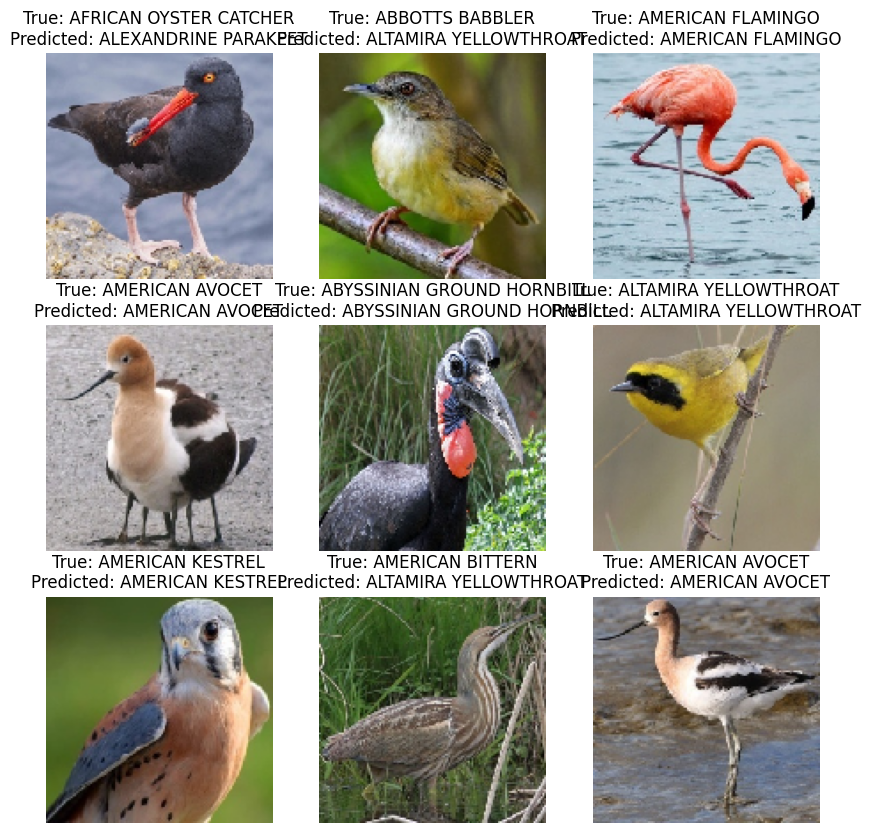

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load a batch of test images
test_images, test_labels = next(test_batches)

# Predict probabilities for the test images
predictions = model.predict(test_images)

# Convert one-hot encoded labels to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = list(test_batches.class_indices.keys())

# Function to plot images with their predicted labels
def plot_images(images, labels_true, labels_pred):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[labels_true[i]]}\nPredicted: {class_labels[labels_pred[i]]}')
        plt.axis('off')
    plt.show()

# Plotting a sample of test images along with their predicted labels
plot_images(test_images, np.argmax(test_labels, axis=1), predicted_classes)


**Inception V3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


base_model=InceptionV3(input_shape=(128,128,3),
                       include_top=False,
                       weights='imagenet')


for layer in base_model.layers:
  layer.trainable=False

from tensorflow.keras.layers import Flatten,Dense,Dropout

x=Flatten()(base_model.output)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(20,activation='softmax')(x)

model=tf.keras.Model(base_model.input,x)

model.summary()
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validation_batches,
    validation_steps=len(validation_batches),
    epochs=20,
    verbose=2
)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_109 (Conv2D)         (None, 63, 63, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 63, 63, 32)           96        ['conv2d_109[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 63, 63, 32)           0         ['batch_normalization_94

Inception V3 is a pre-trained model. The model provides the accuracy of 96.48% with the loss of 32.41% and the validation accuracy of 92%.